## Ankunftsprozess

In diesem Abschnitt wird der Ankunftsprozess der EVs auf dem Parkplatz untersucht.
Zunächst wird zu Vergleichszwecken weiterhin ein mittels eines Zufallsgenerators mit gleichverteilung bestimmt, ob ein neues Auto auf dem Parkplatz erscheint.
Später wird mit dem Poisson-Prozess bestimmt, wie oft ein neues Auto auf dem Parkplatz lädt.
Weiterhin wird implementiert, ob nur während der Öffnungszeiten des Supermarktes, oder auch außerhalb dieser Zeiten geladen werden kann

soc_begin:  gauss , [46.08260716]
soc_begin:  gauss , [12.80190687]
'Tesla_ModelY' charged 31.08 kWh to 83.99 % SOC
soc_begin:  gauss , [49.979609]
soc_begin:  gauss , [33.27672075]
'Porsche_Taycan' charged 82.05 kWh to 100.65 % SOC
'2021_FIAT_500e_Hatchback' charged 20.40 kWh to 98.54 % SOC
'VW_ID3_Pure_45kWh' charged 38.87 kWh to 100.29 % SOC
soc_begin:  gauss , [47.09908771]
soc_begin:  gauss , [19.13946016]
'Tesla_ModelY' charged 15.46 kWh to 65.95 % SOC
soc_begin:  gauss , [10.50947235]
'Tesla_Model_SX_LR' charged 44.90 kWh to 64.04 % SOC
soc_begin:  gauss , [40.53314247]
'VW_ID3_Pure_45kWh' charged 51.91 kWh to 100.01 % SOC
'Tesla_Model_SX_LR' charged 39.24 kWh to 79.77 % SOC
soc_begin:  gauss , [34.99105568]
'VW_ID3_Pure_45kWh' charged 25.30 kWh to 78.61 % SOC
soc_begin:  gauss , [41.40789714]
'Tesla_Model3_LR' charged 48.83 kWh to 100.59 % SOC
soc_begin:  gauss , [24.23767858]
soc_begin:  gauss , [13.7288195]
'Tesla_Model_SX_LR' charged 76.05 kWh to 100.28 % SOC
'Tesla_Model3_L

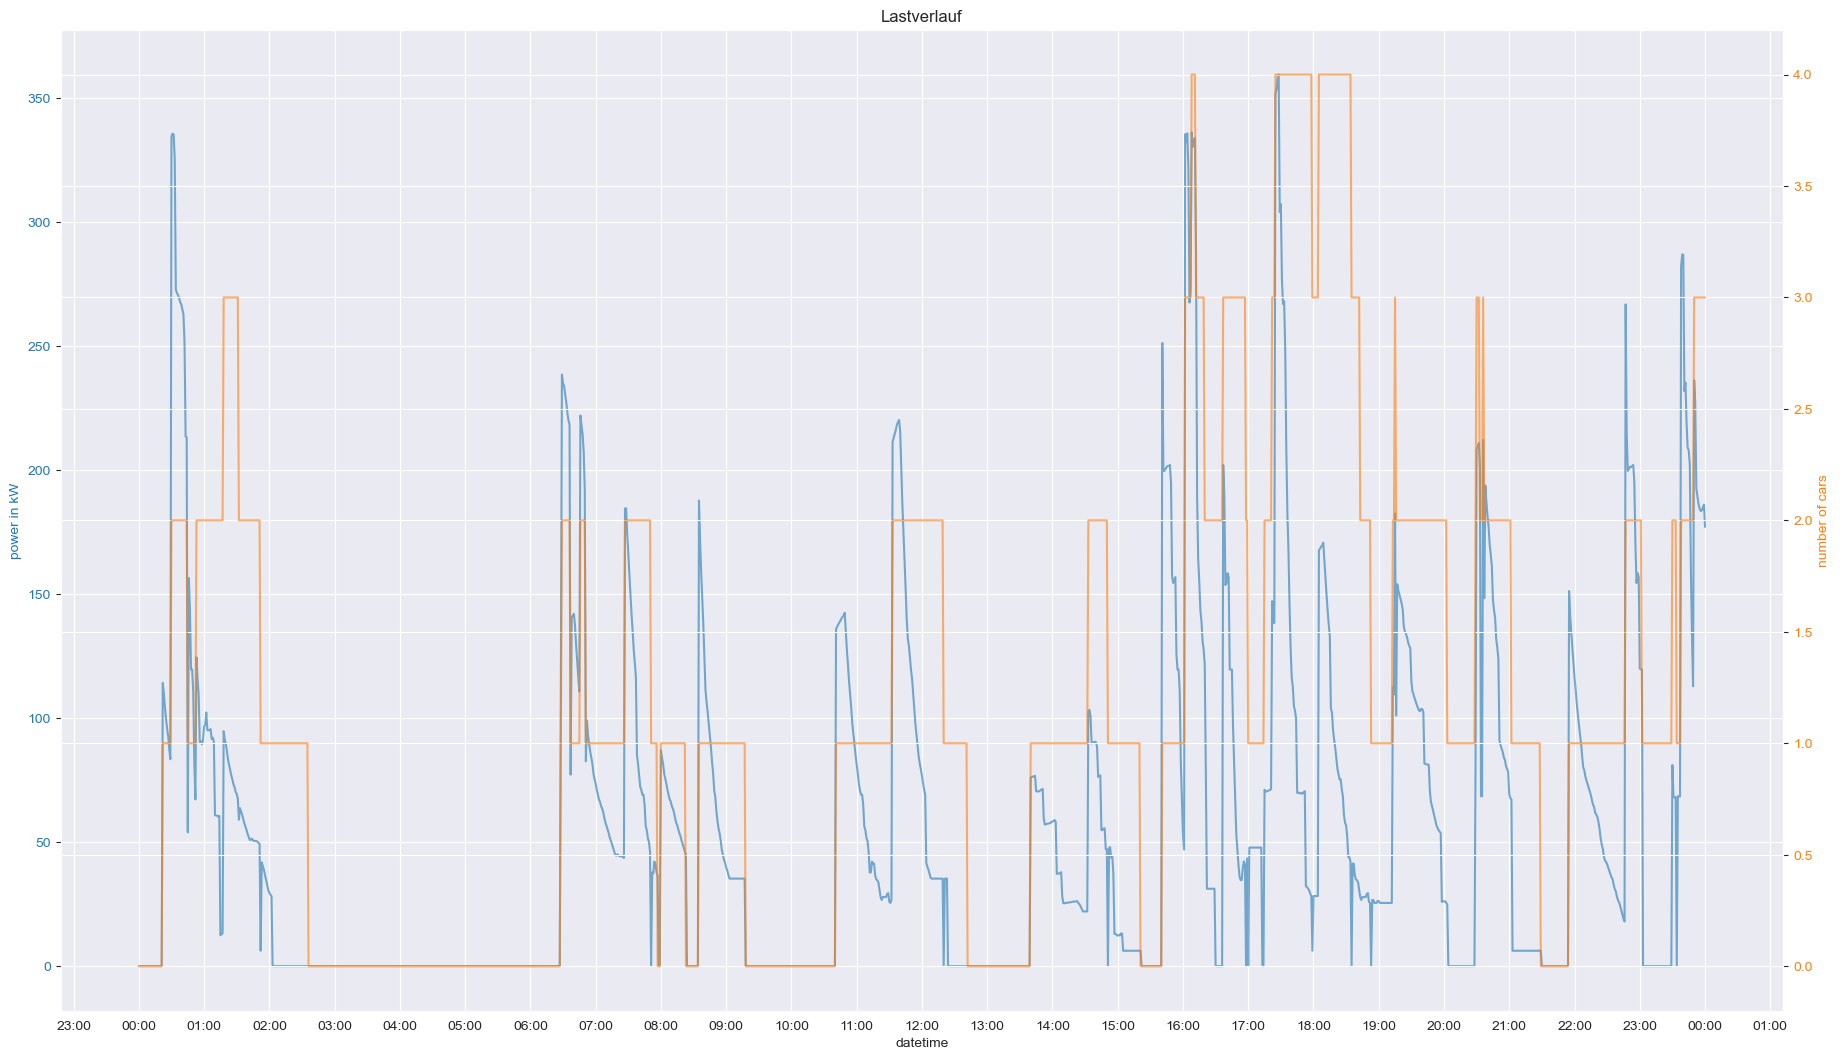

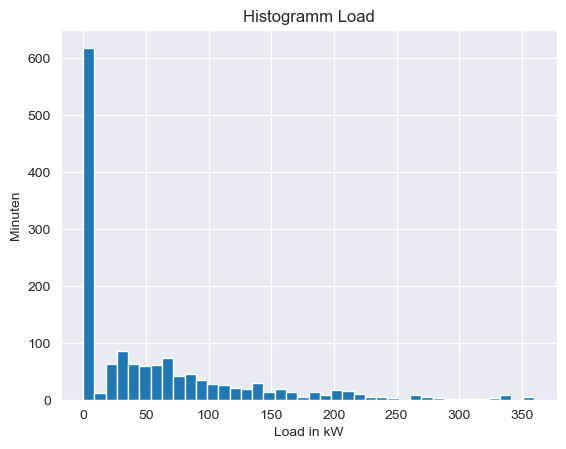

In [2]:
import importlib
import numpy as np
import model_v2

importlib.reload(model_v2)

df_results_returned = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

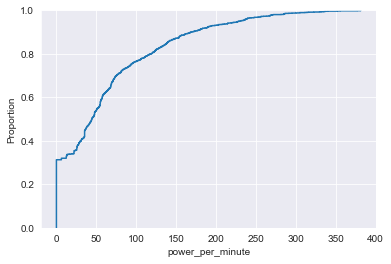

In [14]:
import seaborn as sns
sns.ecdfplot(data=df_results_returned, x="power_per_minute")

In [15]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned)
df_results_returned.describe()

Maximale Last:  381.2187608464401 kWh
Minuten über 60% der maximalen Last (228.73 kWh): 72 Entsprechen  5.00 %
Minuten über 70% der maximalen Last (266.85 kWh): 37 Entsprechen  2.57 %
Minuten über 80% der maximalen Last (304.98 kWh): 15 Entsprechen  1.04 %
Minuten über 90% der maximalen Last (343.10 kWh): 5 Entsprechen  0.35 %
Minuten über 95% der maximalen Last (362.16 kWh): 3 Entsprechen  0.21 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,64.393042,1.222068
std,73.770574,0.996152
min,0.000000,0.000000
25%,0.000000,1.000000
50%,44.306684,1.000000
75%,93.230751,2.000000
max,381.218761,4.000000


## Poisson-Prozess

Ab hier wird für den Ankunftsprozess mit dem Poisson-Prozess gearbeitet

In [5]:
def generate_arrival(lambda_val):
    return np.random.poisson(lambda_val)

def simulate_day(lambda_val, simulation_duration):
    parking_lot_capacity = 10  # Beispielkapazität des Parkplatzes
    parking_lot = [0] * parking_lot_capacity  # 0 bedeutet, dass der Parkplatz leer ist

    for minute in range(simulation_duration):
        new_cars = generate_arrival(lambda_val)

        for _ in range(new_cars):
            if 1 not in parking_lot:  # Überprüfen, ob es freie Parkplätze gibt
                print(f"Neues Auto ist angekommen in Minute {minute}, aber kein Platz verfügbar.")
            else:
                available_parking = [i for i, val in enumerate(parking_lot) if val == 0]
                parking_spot = np.random.choice(available_parking)
                parking_lot[parking_spot] = 1
                print(f"Neues Auto ist in Minute {minute} angekommen und hat einen Parkplatz gefunden.")

    print("Simulation abgeschlossen.")

# Parameter für die Simulation
average_arrival_rate = (0.5/60)  # Durchschnittliche Ankunftsrate pro Stunde
simulation_duration = 24 * 60  # Simulationsdauer in Minuten für einen Tag

# Simulation starten
simulate_day(average_arrival_rate, simulation_duration)

Neues Auto ist angekommen in Minute 88, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 99, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 612, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 690, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 730, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 808, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 868, aber kein Platz verfügbar.
Neues Auto ist angekommen in Minute 1405, aber kein Platz verfügbar.
Simulation abgeschlossen.


soc_begin:  gauss , [27.43640034]
soc_begin:  gauss , [29.91473522]
'2021_FIAT_500e_Hatchback' charged 18.52 kWh to 74.01 % SOC
soc_begin:  gauss , [44.39010128]
'Tesla_Model3_LR' charged 26.59 kWh to 76.62 % SOC
'2021_FIAT_500e_Hatchback' charged 29.56 kWh to 97.82 % SOC
soc_begin:  gauss , [26.92016298]
soc_begin:  gauss , [20.04245225]
soc_begin:  gauss , [48.53526991]
'Porsche_Taycan' charged 68.87 kWh to 100.66 % SOC
'Hyundai_IONIQ5_LongRange' charged 58.55 kWh to 100.68 % SOC
soc_begin:  gauss , [46.08333103]
soc_begin:  gauss , [36.77434813]
'Hyundai_IONIQ5_LongRange' charged 41.82 kWh to 94.38 % SOC
'Hyundai_KONA_64kWh' charged 34.01 kWh to 99.22 % SOC
soc_begin:  gauss , [34.1909066]
soc_begin:  gauss , [19.65369757]
'VW_ID3_Pure_45kWh' charged 20.07 kWh to 54.25 % SOC
'Porsche_Taycan' charged 60.49 kWh to 98.96 % SOC
'Hyundai_IONIQ5_LongRange' charged 37.58 kWh to 100.30 % SOC
soc_begin:  gauss , [47.06155777]
soc_begin:  gauss , [29.58044239]
soc_begin:  gauss , [29.50141846

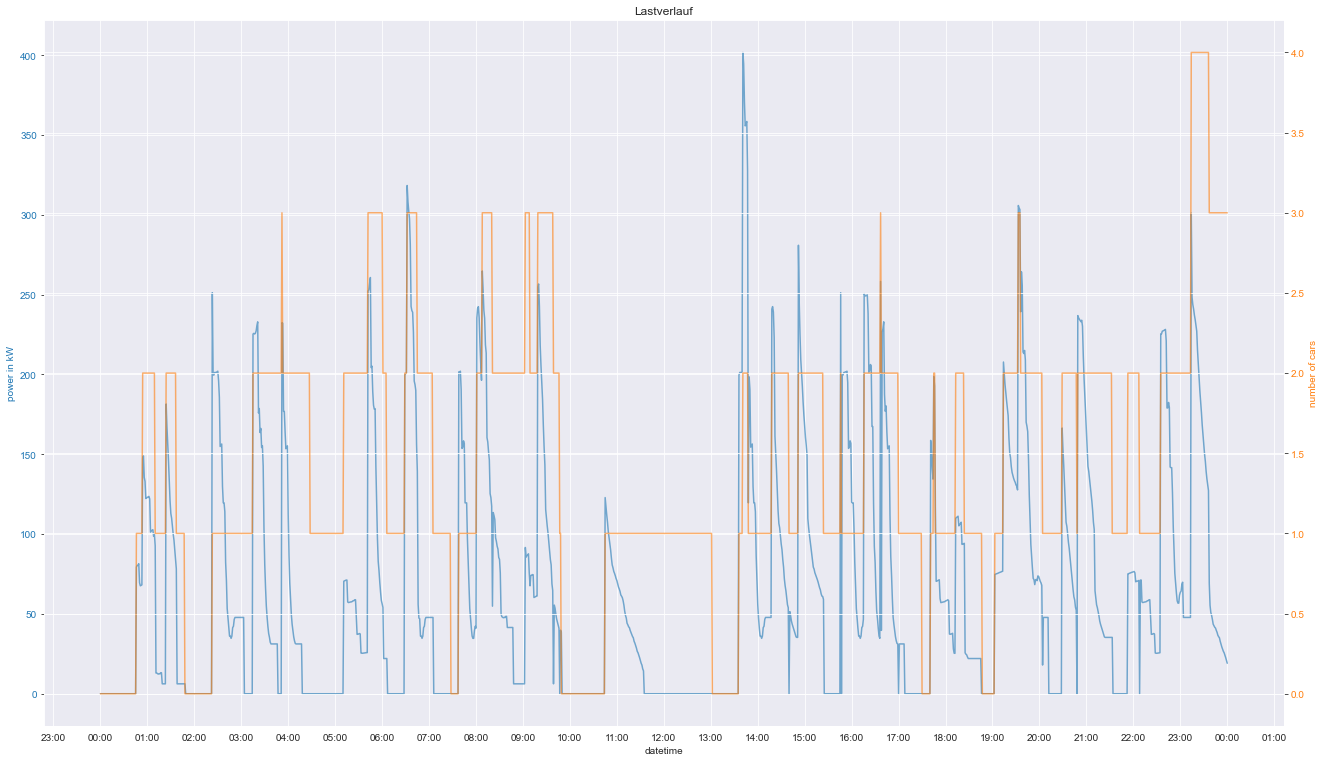

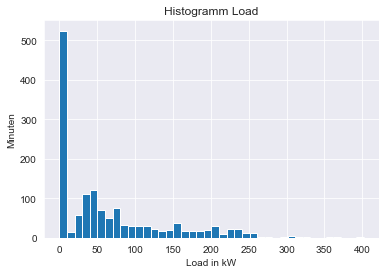

In [17]:
importlib.reload(model_v2)

df_results_returned_poisson = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_poisson)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

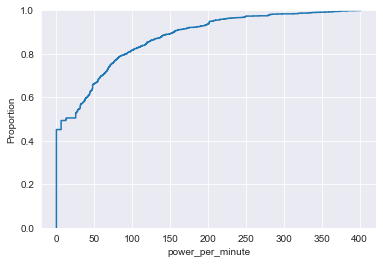

In [7]:
import seaborn as sns
sns.ecdfplot(data=df_results_returned_poisson, x="power_per_minute")

In [8]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_poisson)
df_results_returned_poisson.describe()

Maximale Last:  401.6549063644805 kWh
Minuten über 60% der maximalen Last (240.99 kWh): 48 Entsprechen  3.33 %
Minuten über 70% der maximalen Last (281.16 kWh): 31 Entsprechen  2.15 %
Minuten über 80% der maximalen Last (321.32 kWh): 19 Entsprechen  1.32 %
Minuten über 90% der maximalen Last (361.49 kWh): 10 Entsprechen  0.69 %
Minuten über 95% der maximalen Last (381.57 kWh): 4 Entsprechen  0.28 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,50.716059,1.436502
std,74.377864,1.172734
min,0.000000,0.000000
25%,0.000000,0.000000
50%,12.858788,1.000000
75%,71.462975,2.000000
max,401.654906,4.000000


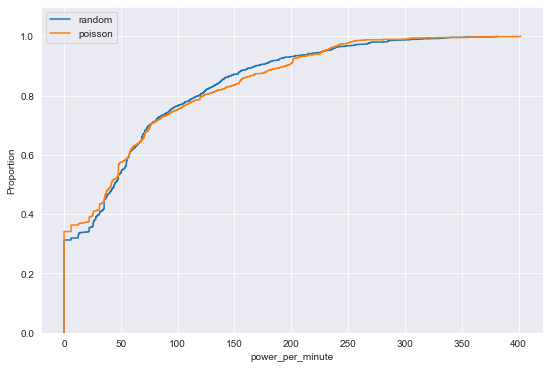

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_returned, x="power_per_minute", label="random")
sns.ecdfplot(data=df_results_returned_poisson, x="power_per_minute", label = "poisson")

plt.ylim(0, 1.1)
plt.legend()
plt.show()

# Mehrere Durchläufe

Nun werden mehrere Durchläufe gemacht und der Durschnitt für einen cdf plot errechnet. Weiterhin wird um diesen ein Konfidenzintervall gelegt

In [23]:
import pandas as pd
importlib.reload(model_v2)

df_results_10_runs = pd.DataFrame()
df_results_10_runs_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_soc_begin.json")
    df_results_10_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_10_runs_single_row = pd.concat([df_results_10_runs_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [27.44564477]
soc_begin:  gauss , [54.98652813]
soc_begin:  gauss , [36.60610884]
'Tesla_Model3_LR' charged 60.01 kWh to 100.19 % SOC
'Tesla_ModelY' charged 36.37 kWh to 99.34 % SOC
soc_begin:  gauss , [50.30534819]
'VW_ID3_Pure_45kWh' charged 27.75 kWh to 98.15 % SOC
soc_begin:  gauss , [37.89564934]
soc_begin:  gauss , [36.88676779]
soc_begin:  gauss , [41.81137399]
'VW_ID3_Pure_45kWh' charged 31.06 kWh to 91.45 % SOC
soc_begin:  gauss , [35.19129998]
soc_begin:  gauss , [19.46373329]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'2021_FIAT_500e_Hatchback' charged 20.59 kWh to 90.83 % SOC
'Hyundai_IONIQ5_LongRange' charged 45.90 kWh to 100.11 % SOC
soc_begin:  gauss , [35.75547443]
'Hyundai_KONA_64kWh' charged 41.84 kWh to 100.57 % SOC
'Tesla_Model3_LR' charged 47.91 kWh to 93.83 % SOC
'Tesla_Model3_LR' charged 52.64 kWh to 100.41 % SOC
soc_begin:  gauss , [26.93753567]
soc_begin:  gauss , [19.85557243]
soc_begin:  gauss , [21.41183955]
soc_begin:  gauss , [21.44606

In [24]:
import pandas as pd
import importlib
import model_v2
importlib.reload(model_v2)

df_results_10_runs = pd.DataFrame()
df_results_10_runs_single_row_poisson = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_soc_begin.json")
    df_results_10_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_10_runs_single_row_poisson = pd.concat([df_results_10_runs_single_row_poisson, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [40.93401895]
soc_begin:  gauss , [11.55791505]
'Tesla_Model3_LR' charged 64.15 kWh to 89.31 % SOC
soc_begin:  gauss , [24.22352718]
'VW_ID3_Pure_45kWh' charged 34.46 kWh to 100.36 % SOC
soc_begin:  gauss , [37.1704115]
'Tesla_ModelY' charged 59.94 kWh to 97.33 % SOC
'2021_FIAT_500e_Hatchback' charged 23.15 kWh to 92.30 % SOC
soc_begin:  gauss , [26.69770939]
soc_begin:  gauss , [26.88703813]
'Tesla_Model3_LR' charged 52.27 kWh to 90.05 % SOC
'2021_FIAT_500e_Hatchback' charged 28.91 kWh to 95.73 % SOC
soc_begin:  gauss , [25.83522621]
soc_begin:  gauss , [42.12496191]
soc_begin:  gauss , [45.0600942]
soc_begin:  gauss , [25.7111692]
'Hyundai_KONA_64kWh' charged 44.27 kWh to 95.01 % SOC
'Porsche_Taycan' charged 44.53 kWh to 73.39 % SOC
soc_begin:  gauss , [34.66774458]
'Hyundai_KONA_64kWh' charged 25.17 kWh to 84.39 % SOC
'Tesla_Model_SX_LR' charged 58.18 kWh to 100.31 % SOC
'2021_FIAT_500e_Hatchback' charged 26.13 kWh to 96.88 % SOC
soc_begin:  gauss , [18.29858463]

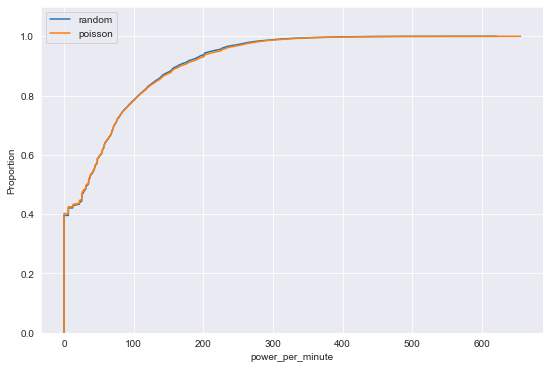

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_10_runs_single_row, x="power_per_minute", label="random")
sns.ecdfplot(data=df_results_10_runs_single_row_poisson, x="power_per_minute", label = "poisson")

plt.ylim(0, 1.1)
plt.legend()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
%matplotlib qt5

# dataframe input
df = df_results_10_runs_single_row

# CDF-Plot für die erste Spalte
# ecdf_values = np.linspace(min(df.iloc[:, 0]), max(df.iloc[:, 0]), len(df))
ecdf_values = np.linspace(min(df.iloc[:, 0]), max(df.iloc[:, 0]), 100)
plt.step(np.sort(df.iloc[:, 0]), np.arange(1, len(df) + 1) / len(df), label='Column 1')

# Bootstrap-Methode zur Berechnung des Konfidenzintervalls für die ECDF
confidence_level = 0.99
n_bootstrap_samples = 1000

ecdf_bootstrap = np.empty((n_bootstrap_samples, len(ecdf_values)))

for i in range(n_bootstrap_samples):
    bootstrap_sample = resample(df.iloc[:, 0])
    ecdf_bootstrap[i, :] = np.searchsorted(np.sort(bootstrap_sample), ecdf_values, side='right')

# Konfidenzintervall für ECDF berechnen
lower_bound = np.percentile(ecdf_bootstrap, (1 - confidence_level) / 2 * 100, axis=0)
upper_bound = np.percentile(ecdf_bootstrap, (1 + confidence_level) / 2 * 100, axis=0)

# Konfidenzintervall plotten
plt.fill_between(ecdf_values, lower_bound / len(df), upper_bound / len(df),
                 color='gray', alpha=0.3, label=f'{int(confidence_level * 100)}% CI')

# Plot-Einstellungen
plt.title('ECDF Plot with Confidence Interval')
plt.xlabel('Power (kW)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample

# dataframe input
df = df_results_10_runs_single_row

# CDF-Plot für die erste Spalte
ecdf_values = np.linspace(min(df_results_10_runs_single_row.iloc[:, 0]), max(df_results_10_runs_single_row.iloc[:, 0]), len(df))
plt.step(np.sort(df.iloc[:, 0]), np.arange(1, len(df) + 1) / len(df), label='Column 1')

# Bootstrap-Methode zur Berechnung des Konfidenzintervalls für die ECDF
confidence_level = 0.98
n_bootstrap_samples = 1000

ecdf_bootstrap = np.empty((n_bootstrap_samples, len(ecdf_values)))

for i in range(n_bootstrap_samples):
    bootstrap_sample = resample(df.iloc[:, 0])
    ecdf_bootstrap[i, :] = np.searchsorted(np.sort(bootstrap_sample), ecdf_values, side='right')

# Konfidenzintervall für ECDF berechnen
lower_bound = np.percentile(ecdf_bootstrap, (1 - confidence_level) / 2 * 100, axis=0)
upper_bound = np.percentile(ecdf_bootstrap, (1 + confidence_level) / 2 * 100, axis=0)

# Konfidenzintervall plotten
plt.fill_between(ecdf_values, lower_bound / len(df), upper_bound / len(df),
                 color='gray', alpha=0.3, label=f'{int(confidence_level * 100)}% CI')

# Plot-Einstellungen
plt.title('ECDF Plot with Confidence Interval')
plt.xlabel('Power (kW)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Annahme: df_results_10_runs ist dein DataFrame

# Plot-Einstellungen
plt.figure(figsize=(10, 6))
plt.title('Gemeinsamer CDF Plot für Lastverläufe')

# Iteriere über die Spalten des Dataframes
for column in df_results_10_runs.columns:
    # Extrahiere die Werte aus der aktuellen Spalte und konvertiere sie zu einem Numpy-Array
    values = df_results_10_runs[column].sort_values().to_numpy()

    # Berechne die empirische Verteilungsfunktion (CDF)
    cdf = (np.arange(1, len(values) + 1) / len(values))

    # Plotte die CDF
    plt.plot(values, cdf, label=column)

# Plotbeschriftungen
plt.xlabel('Lastverlauf')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Annahme: df_results_10_runs ist dein DataFrame

# Plot-Einstellungen
plt.figure(figsize=(10, 6))
plt.title('Gemeinsamer CDF Plot für Lastverläufe')

# Leeres Numpy-Array für alle Werte in den Spalten
all_values = np.array([])

# Iteriere über die Spalten des Dataframes
for column in df_results_10_runs.columns:
    # Extrahiere die Werte aus der aktuellen Spalte und füge sie zum Numpy-Array hinzu
    values = df_results_10_runs[column].sort_values().to_numpy()
    all_values = np.concatenate((all_values, values))

# Sortiere alle Werte
sorted_values = np.sort(all_values)

# Berechne die empirische Verteilungsfunktion (CDF)
cdf = (np.arange(1, len(sorted_values) + 1) / len(sorted_values))

# Plotte die CDF
plt.plot(sorted_values, cdf, label='Gemeinsamer CDF')

# Plotbeschriftungen
plt.xlabel('Lastverlauf')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Annahme: df_results_10_runs ist dein DataFrame

# Leeres Numpy-Array für alle Werte in den Spalten
all_values = np.array([])

# Iteriere über die Spalten des Dataframes
for column in df_results_10_runs.columns:
    # Extrahiere die Werte aus der aktuellen Spalte und füge sie zum Numpy-Array hinzu
    values = df_results_10_runs[column].sort_values().to_numpy()
    all_values = np.concatenate((all_values, values))

# Sortiere alle Werte
sorted_values = np.sort(all_values)

# Berechne die empirische Verteilungsfunktion (CDF)
cdf = (np.arange(1, len(sorted_values) + 1) / len(sorted_values))

# Verwende Kernel Density Estimation (KDE) für das Konfidenzintervall
kde = KernelDensity(bandwidth=0.4, kernel='gaussian')
kde.fit(sorted_values[:, None])
kde_values = np.exp(kde.score_samples(sorted_values[:, None]))

# Konfidenzintervall (Beispiel: 95%)
lower_bound = norm.ppf(0.025, loc=kde_values, scale=np.std(kde_values))
upper_bound = norm.ppf(0.975, loc=kde_values, scale=np.std(kde_values))

# Plotte die CDF
plt.plot(sorted_values, cdf, label='Gemeinsamer CDF')

# Fülle das Konfidenzintervall basierend auf der KDE
plt.fill_between(sorted_values, lower_bound, upper_bound, color='gray', alpha=0.3, label='KDE-Konfidenzintervall')

# Plotbeschriftungen
plt.xlabel('Lastverlauf')
plt.ylabel('CDF')
plt.title('Gemeinsamer CDF Plot mit KDE-Konfidenzintervall für Lastverläufe')
plt.legend()
plt.grid(True)
plt.show()
